In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

ROKU
[*********************100%***********************]  1 of 1 completed


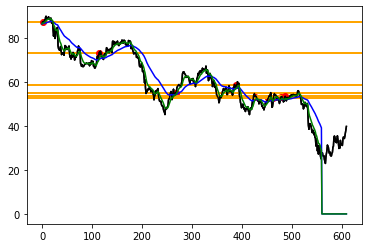

In [3]:
a = 0
diffrence_list = []
diffrence_list_idx = []

df = 'ROKU'

print(df)
df = yf.download(df[a],'2018-1-1', '2020-6-5')

df.to_excel("output.xlsx")
df = pd.read_excel (r'C:\Users\vedan\output.xlsx')

fig, ax = plt.subplots()
ax.plot(df['Close'], color='black')

EMA_20 = np.zeros(len(df))
EMA_70 = np.zeros(len(df))
q = 1
EMA_20[0] = df['Close'][0]
EMA_70[0] = df['Close'][0]
i = 10
t = 50
while q < (len(df)-50):
    k = 2/(i+1)
    l = 2/(t+1)
    EMA_20[q] = (df['Close'][q])*(k) + (EMA_20[q-1]*(1 - (k)))
    EMA_70[q] = (df['Close'][q])*(l) + (EMA_70[q-1]*(1 - (l)))

    if (EMA_20[q] - EMA_70[q]) > 0 and EMA_20[q-1] - EMA_70[q-1] <= 0:
        diffrence_list = np.append(diffrence_list, df['Close'][q])
        diffrence_list_idx = np.append(diffrence_list_idx, q)
#             print('buy')

    q = q + 1

for idx, i in enumerate(diffrence_list):
    ax.axhline(i, linewidth=2, color='Orange')
    plt.plot(diffrence_list_idx[idx],i,'ro')

diffrence_list = []
diffrence_list_idx = []
plt.plot(df['Close'], color='black')
plt.plot(EMA_70, color='Blue')
plt.plot(EMA_20, color='Green')
